In [1]:
#LIBRERIAS 
#==================================================================================================================================
import random
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle
from tensorflow.keras import datasets, layers, models
import tqdm
import pandas as pd
from IPython.display import clear_output
import numpy as np
from keras.models import load_model
from keras.optimizers import Adam
from keras import Model
from keras.utils.vis_utils import plot_model

In [2]:
#Lectura de los datos
#==================================================================================================================================
#Cargamos los datos previamente creados en el preprocesado
with open("datos", "rb") as fp:   
    datos = pickle.load(fp)
datos=pd.DataFrame(datos,columns=["img","val"])
#cargamos los datos del Nir
folder_nir = "C:/Users/Usuario/Desktop/Red Neuro/F jpg/nir.csv"
DataF=pd.read_csv(folder_nir,sep=",",decimal='.')
#sacamos la transpuesta de los datos de nir por que necesitamos que cada corcho sea una columna para poder sacar su valor 
tras=DataF.T
#Creamos una nueva variable en el dataframe principal, el de imagenes, que divida las variables segun su cercania a la media.
#De esta manera los sets de entrenamiento y comprobacion tendran una distribucion similar. 
datos["clas"]=2
datos.loc[datos.val<(np.mean(datos.val)-0.5*np.std(datos.val)), "clas"]=1
datos.loc[datos.val<(np.mean(datos.val)-1.5*np.std(datos.val)), "clas"]=0
datos.loc[datos.val>(np.mean(datos.val)+0.5*np.std(datos.val)), "clas"]=3
datos.loc[datos.val>(np.mean(datos.val)+1.5*np.std(datos.val)), "clas"]=4
#Realizamos la division train test de forma que obtenemos una lista de indices 
train,test=train_test_split(range(315),test_size=0.2,random_state=42,stratify=datos.clas)

#Data Augemtation
#==================================================================================================================================
#preparamos las listas que contendran los datos de entrenamiento
train_im=[]
train_nir=[]
train_val=[]

for x in train: 
    #Imagen original
    train_im.append(datos.iloc[x,0])  
    train_val.append(datos.iloc[x,1])  
    train_nir.append(tras[x].to_list())
    #inversion horizontal
    flip = tf.image.flip_left_right(datos.iloc[x,0])
    train_im.append(flip)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
    #inversion vertical
    invert = tf.image.flip_up_down(datos.iloc[x,0])
    train_im.append(invert)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
    #inversion vertical y horizontal
    invertflip = tf.image.flip_up_down(flip)
    train_im.append(invertflip)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
    #Saturacion aumentada 1.5
                 #imagen Original
    saturated = tf.image.adjust_saturation(datos.iloc[x,0], 1.5)
    train_im.append(saturated)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
                 #imagen flip
    saturated = tf.image.adjust_saturation(flip, 1.5)
    train_im.append(saturated)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
                 #imagen invert
    saturated = tf.image.adjust_saturation(invert, 1.5)
    train_im.append(saturated)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
                 #imagen invert y flip
    saturated = tf.image.adjust_saturation(invertflip, 1.5)
    train_im.append(saturated)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
    #Brillo aumentado en 0.2
                #imagen Original
    bright = tf.image.adjust_brightness(datos.iloc[x,0], 0.2)
    train_im.append(bright)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
                 #imagen flip
    bright = tf.image.adjust_brightness(flip, 0.2)
    train_im.append(bright)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
                 #imagen invert
    bright = tf.image.adjust_brightness(invert, 0.2)
    train_im.append(bright)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())
                 #imagen invert y flip
    bright = tf.image.adjust_brightness(invertflip, 0.2)
    train_im.append(bright)  
    train_val.append(datos.iloc[x,1])
    train_nir.append(tras[x].to_list())

#preparamos las listas que contendran los datos de comprobación
test_im=[]
test_nir=[]
test_val=[]
for x in test: 
    test_im.append(datos.iloc[x,0])  
    test_val.append(datos.iloc[x,1])
    test_nir.append(tras[x].to_list())
#Transformamos las listas en arrays para poder darselos al modelo
train_im=np.array(train_im)
train_val=np.array(train_val)
train_nir=np.array(train_nir)
test_im=np.array(test_im)
test_val=np.array(test_val)
test_nir=np.array(test_nir)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


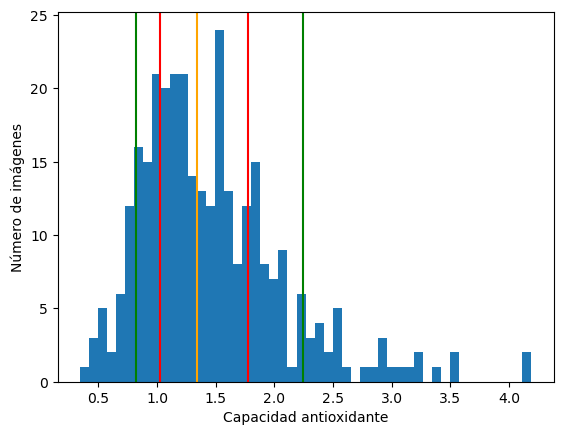

1.7717317485000001
1.0244057725000002
2.2420543296
0.8174872666


In [3]:
#Comprobar la distibucion de train
plt.hist(datos["val"],bins=50)
plt.xlabel('Capacidad antioxidante')
approx_median = np.percentile(datos["val"], 50)
q3 = np.percentile(datos["val"], 75)
q1 = np.percentile(datos["val"], 25)
q9 = np.percentile(datos["val"], 90)
q2 = np.percentile(datos["val"], 10)
plt.axvline(approx_median, color='orange')
plt.axvline(q3, color='red')
plt.axvline(q1, color='red')
plt.axvline(q9, color='green')
plt.axvline(q2, color='green')
plt.ylabel('Número de imágenes')
plt.show()
print(q3)
print(q1)
print(q9)
print(q2)

In [4]:
#####Calcular numero exacto por debajo de 0.75 y 2

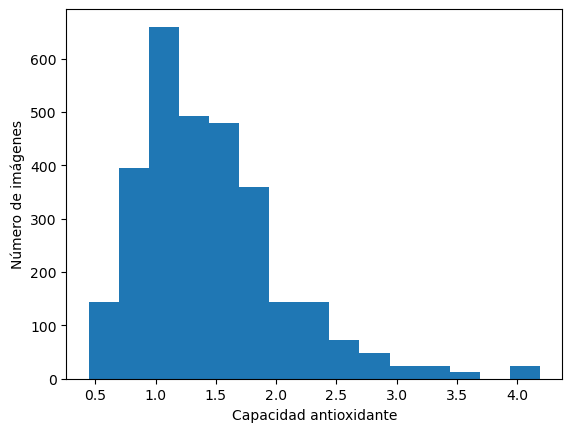

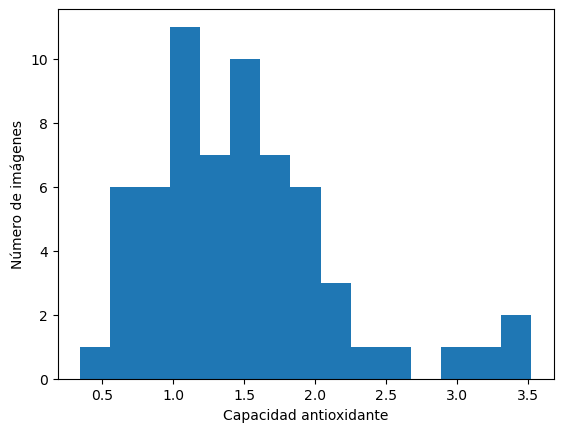

In [5]:
#Comprobar la distibucion de train
plt.hist(train_val,bins=15)
plt.xlabel('Capacidad antioxidante')
plt.ylabel('Número de imágenes')
plt.show()
#Comprobar la distibucion de test
plt.hist(test_val,bins=15)
plt.xlabel('Capacidad antioxidante')
plt.ylabel('Número de imágenes')
plt.show()

In [6]:
print(np.mean(datos["val"]))
print(np.median(datos["val"]))
train_val

1.4651718004603174
1.343887946


array([0.68913413, 0.68913413, 0.68913413, ..., 1.4737691 , 1.4737691 ,
       1.4737691 ])

In [4]:
#Primera rama del modelo, rama MLP de los datos del NIR
input_x=layers.Input(1154)
mlp=layers.Dense(32, activation="relu")(input_x)
mlp=layers.Dense(16, activation="relu")(mlp)
#model_mlp = Model(input_x, mlp)

#Segunda rama del modelo, rama CNN de las imagenes
input_y=layers.Input((2048, 2048, 3))

cnn=layers.Conv2D(4, 3,padding="same", activation='relu')(input_y)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(8, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(16, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(32, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(64, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(128, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(4, 4))(cnn)

cnn=layers.Flatten()(cnn)
cnn=layers.Dense(128, activation='relu')(cnn)
cnn=layers.Dropout(.35)(cnn)
cnn =layers.Dense(64, activation='relu')(cnn)
cnn =layers.Dense(32, activation='relu')(cnn)
cnn=layers.Dense(16, activation="relu")(cnn)
#model_cnn = Model(input_y, cnn)

#Union de las ramas en la red principal
combinedInput = layers.Concatenate()([mlp,cnn])
x = layers.Dense(4, activation="relu")(combinedInput)
x = layers.Dense(1, activation="linear")(x)
model = Model(inputs=[input_x, input_y], outputs=x)

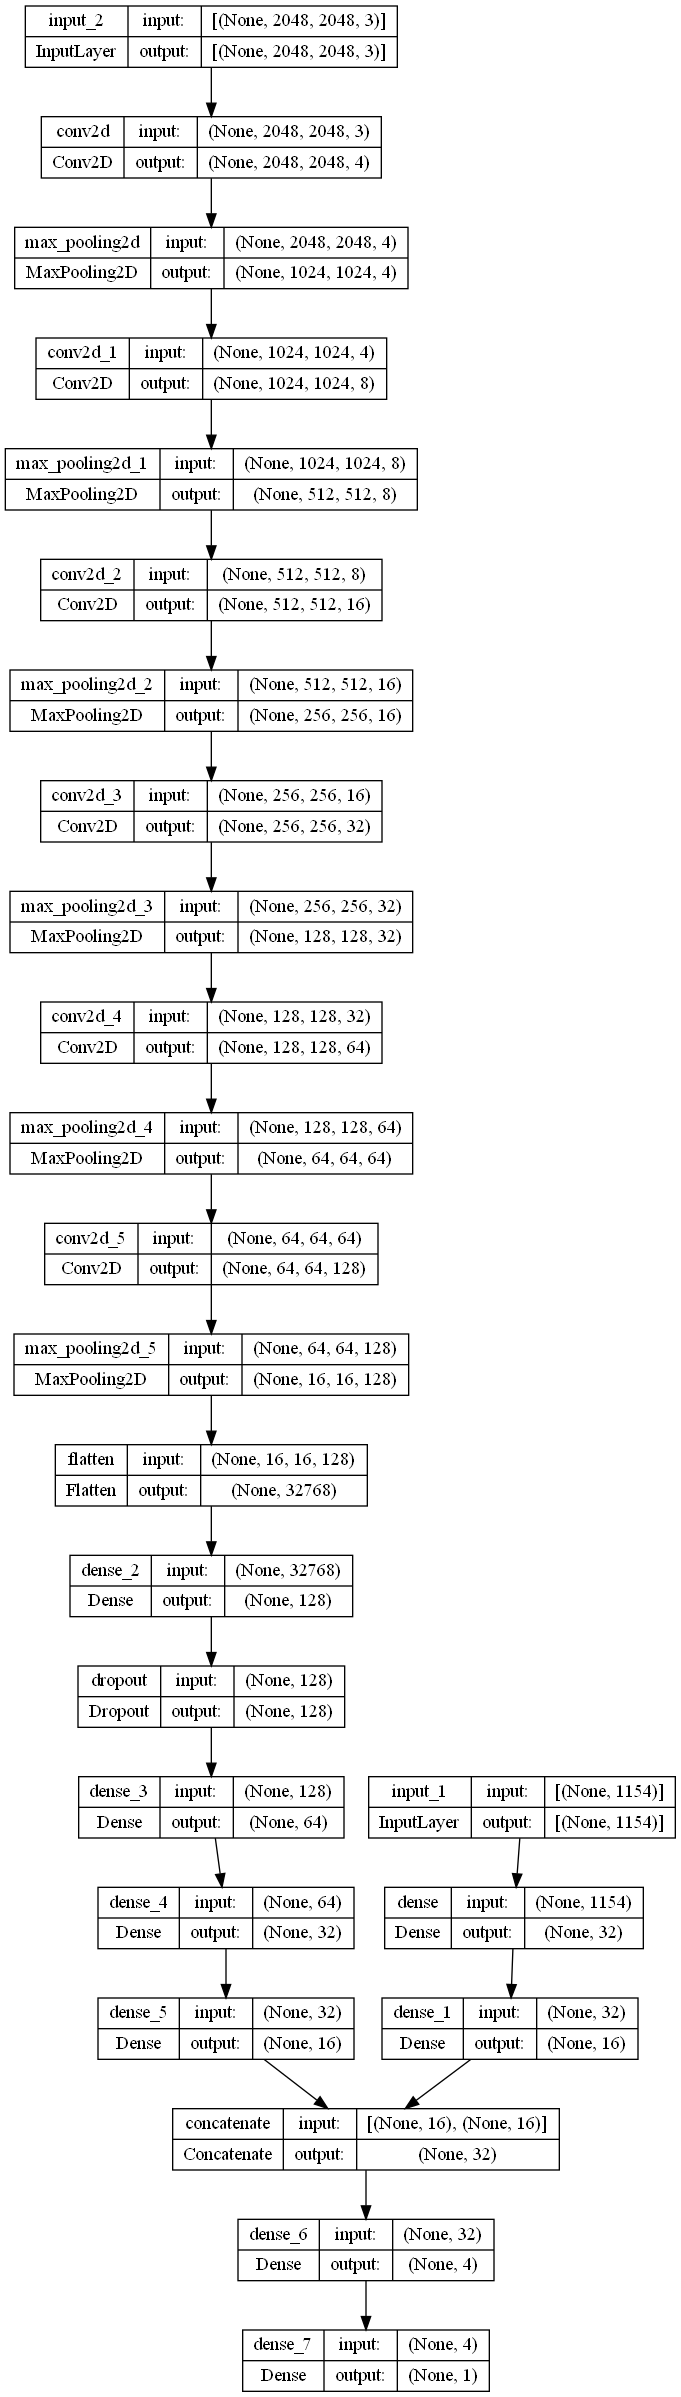

In [6]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#######MOdelo 1######

In [ ]:
#######MOdelo 1######

In [ ]:
#######MOdelo 1######

In [ ]:
#######MOdelo 1######

In [ ]:
#######MOdelo 1######

In [6]:
train_loss=[]
test_loss=[]

In [ ]:
batch_size = 8
epochs = 128
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError()
             )

for e in tqdm.tqdm(range(epochs)):
    loss = []
    for i in tqdm.tqdm(range(len(train_im)//batch_size)):
        x_im=train_im[batch_size*i:batch_size*(i+1), :, :, :]
        x_nir=train_nir[batch_size*i:batch_size*(i+1)]
        y=train_val[batch_size*i:batch_size*(i+1)]
        loss.append(model.train_on_batch([x_nir,x_im], y))
    train_loss.append(np.mean(np.array(loss)))

    loss = []
    for i in tqdm.tqdm(range(len(test_im)//batch_size)):
        x_im=test_im[batch_size*i:batch_size*(i+1), :, :, :]
        x_nir=test_nir[batch_size*i:batch_size*(i+1)]
        y=test_val[batch_size*i:batch_size*(i+1)]
        loss.append(model.test_on_batch([x_nir,x_im], y))
    test_loss.append(np.mean(np.array(loss)))

    clear_output()

    model.save("Modelo_Convinado.keras")
    with open("train_l", "wb") as fp:   
        pickle.dump(train_loss, fp)
    with open("test_l", "wb") as fp:   
        pickle.dump(test_loss, fp)
    
    plt.plot(range(len(train_loss)), train_loss)
    plt.show()
    plt.plot(range(len(test_loss)), test_loss)
    plt.show()

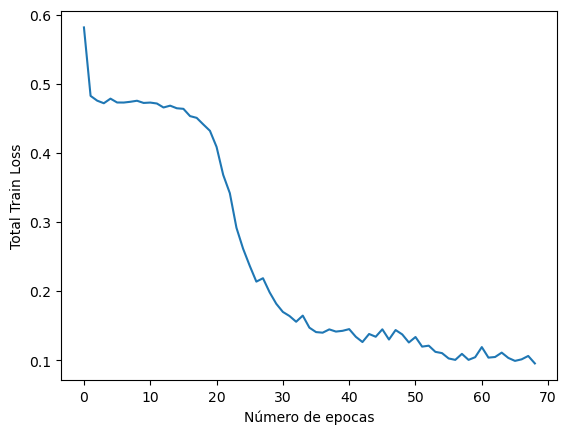

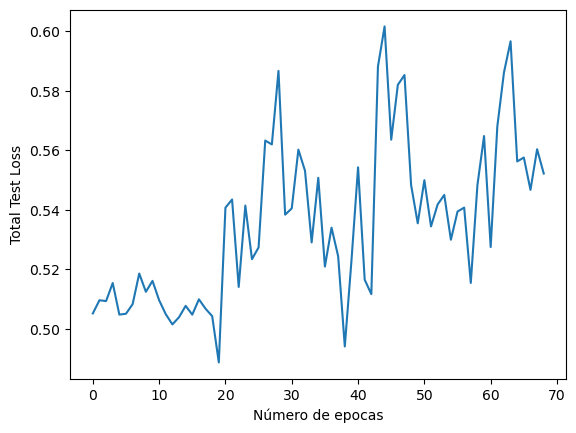

In [6]:
#RESULTADOS DEL MODELO 1
model = load_model("Modelo_Convinado.keras")
with open("train_l", "rb") as fp:   
    train_loss = pickle.load(fp)
with open("test_l", "rb") as fp:   
    test_loss = pickle.load(fp)
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Número de epocas')
plt.ylabel('Total Train Loss')
plt.show()
plt.plot(range(len(test_loss)), test_loss)
plt.xlabel('Número de epocas')
plt.ylabel('Total Test Loss')
plt.show()

In [7]:
preds = model.predict([test_nir,test_im],1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(test_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))
Soluciones.to_csv("Test_comb.csv")

63/63 [==============================] - 1s 20ms/step


,pred,test,error
0,1.206243,1.544567,-0.338324
1,1.349357,0.758149,0.591207
2,1.311675,0.344058,0.967617
3,1.719108,0.794822,0.924286
4,1.528640,1.085144,0.443496
...,...,...,...
58,1.940075,1.414431,0.525644
59,1.698969,1.184465,0.514503
60,1.788455,1.918421,-0.129966
61,1.431711,1.098132,0.333579


0.5239780125137127


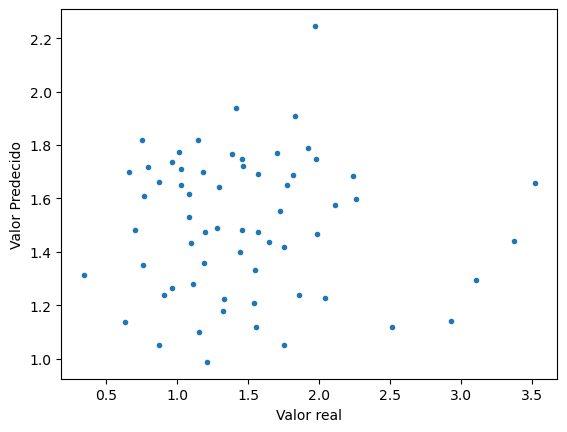

In [8]:
plt.plot(Soluciones['test'], Soluciones['pred'], '.')
plt.xlabel('Valor real')
plt.ylabel('Valor Predecido')
plt.show()

In [9]:
preds = model.predict([train_nir,train_im],1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(train_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(np.mean(Soluciones['error']))
print(np.median(Soluciones['error']))
print(np.std(Soluciones['error']))

3024/3024 [==============================] - 73s 24ms/step


,pred,test,error
0,0.659094,0.689134,-0.030040
1,0.795430,0.689134,0.106296
2,0.720082,0.689134,0.030948
3,0.741434,0.689134,0.052300
4,0.698527,0.689134,0.009393
...,...,...,...
3019,1.503977,1.473769,0.030208
3020,1.471841,1.473769,-0.001928
3021,1.543305,1.473769,0.069536
3022,1.513028,1.473769,0.039259


-0.019759491957340426
-0.0004966021365050421
0.14265062719878863


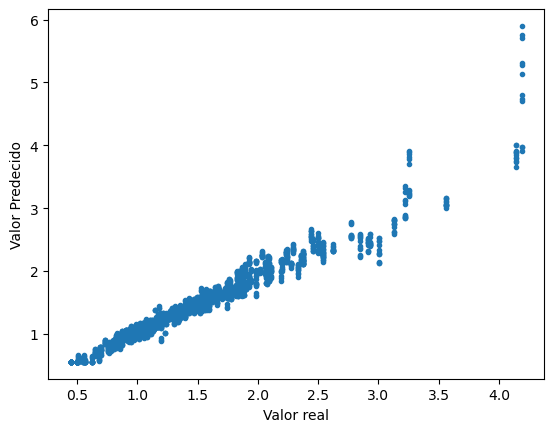

0.0889000190488877


In [10]:
plt.plot(Soluciones['test'], Soluciones['pred'], '.')
plt.xlabel('Valor real')
plt.ylabel('Valor Predecido')
plt.show()
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))

In [ ]:
#######MOdelo 2######

In [ ]:
#######MOdelo 2######

In [ ]:
#######MOdelo 2######

In [ ]:
#######MOdelo 2######

In [ ]:
#######MOdelo 2######

In [ ]:
#######MOdelo 2######

In [ ]:
#######MOdelo 2######

In [49]:
train_loss=[]
test_loss=[]

In [25]:
input_x=layers.Input(1154)
mlp=layers.Dense(32, activation="relu")(input_x)
mlp=layers.Dense(16, activation="relu")(mlp)
mlp = layers.Dense(4, activation="relu")(mlp)
mlp = layers.Dense(1, activation="linear")(mlp)
model_MLP = Model(inputs=input_x, outputs=mlp)

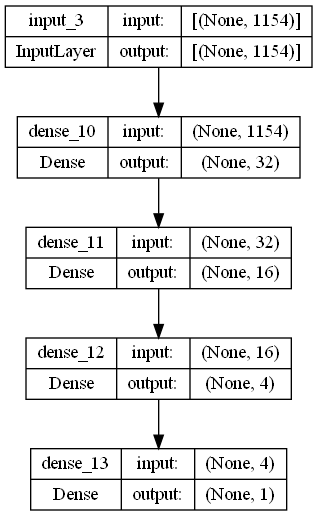

In [26]:
model_MLP.summary()

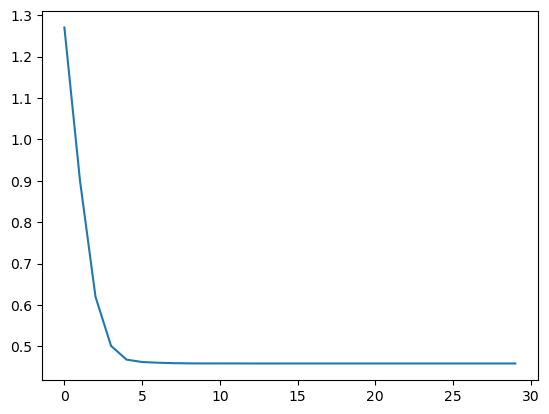

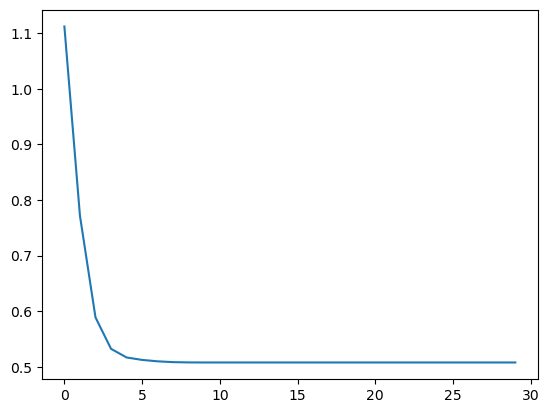

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:20<00:00,  2.70s/it]


In [51]:
batch_size = 8
epochs = 30
model_MLP.compile(optimizer=Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError()
             )

for e in tqdm.tqdm(range(epochs)):
    loss = []
    for i in tqdm.tqdm(range(len(train_nir)//batch_size)):
        x_nir=train_nir[batch_size*i:batch_size*(i+1)]
        y=train_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_MLP.train_on_batch(x_nir, y))
    train_loss.append(np.mean(np.array(loss)))

    loss = []
    for i in tqdm.tqdm(range(len(test_nir)//batch_size)):
        x_nir=test_nir[batch_size*i:batch_size*(i+1)]
        y=test_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_MLP.test_on_batch(x_nir, y))
    test_loss.append(np.mean(np.array(loss)))

    clear_output()

    model_MLP.save("Modelo_MLP.keras")
    with open("train_lMLP", "wb") as fp:   
        pickle.dump(train_loss, fp)
    with open("test_lMLP", "wb") as fp:   
        pickle.dump(test_loss, fp)
    
    plt.plot(range(len(train_loss)), train_loss)
    plt.show()
    plt.plot(range(len(test_loss)), test_loss)
    plt.show()

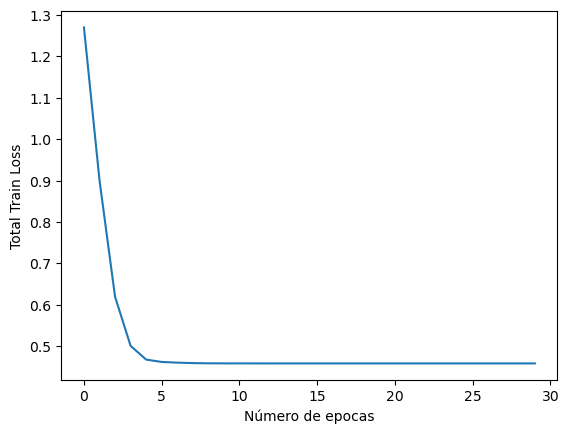

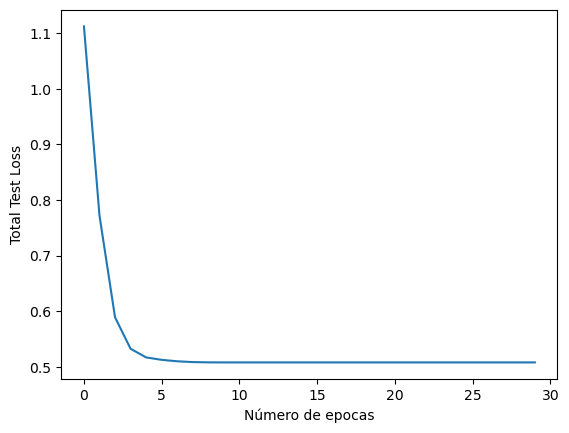

In [87]:
#RESULTADOS DEL MODELO 2
model_MLP = load_model("Modelo_MLP.keras")
with open("train_lMLP", "rb") as fp:   
    train_loss = pickle.load(fp)
with open("test_lMLP", "rb") as fp:   
    test_loss = pickle.load(fp)
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Número de épocas')
plt.ylabel('Total Train Loss')
plt.show()
plt.plot(range(len(test_loss)), test_loss)
plt.xlabel('Número de épocas')
plt.ylabel('Total Test Loss')
plt.show()

In [92]:
preds = model_MLP.predict(test_nir,1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(test_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))
Soluciones.to_csv("Test_MLP.csv")

63/63 [==============================] - 0s 792us/step


,pred,test,error
0,1.339293,1.544567,-0.205274
1,1.339293,0.758149,0.581143
2,1.339293,0.344058,0.995235
3,1.339293,0.794822,0.544471
4,1.339293,1.085144,0.254148
...,...,...,...
58,1.339293,1.414431,-0.075138
59,1.339293,1.184465,0.154828
60,1.339293,1.918421,-0.579128
61,1.339293,1.098132,0.241160


0.4831721693017287


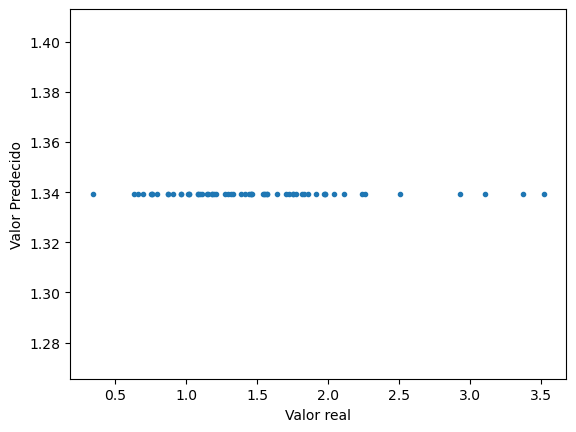

In [83]:
plt.plot(Soluciones['test'], Soluciones['pred'], '.')
plt.xlabel('Valor real')
plt.ylabel('Valor Predecido')
plt.show()

In [58]:
preds = model_MLP.predict(train_nir,1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(train_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(np.mean(Soluciones['error']))
print(np.median(Soluciones['error']))
print(np.std(Soluciones['error']))

3024/3024 [==============================] - 2s 611us/step


,pred,test,error
0,1.339293,0.689134,0.650159
1,1.339293,0.689134,0.650159
2,1.339293,0.689134,0.650159
3,1.339293,0.689134,0.650159
4,1.339293,0.689134,0.650159
...,...,...,...
3019,1.339293,1.473769,-0.134476
3020,1.339293,1.473769,-0.134476
3021,1.339293,1.473769,-0.134476
3022,1.339293,1.473769,-0.134476


-0.11938922255455768
0.0007528661636962974
0.6150766630605925


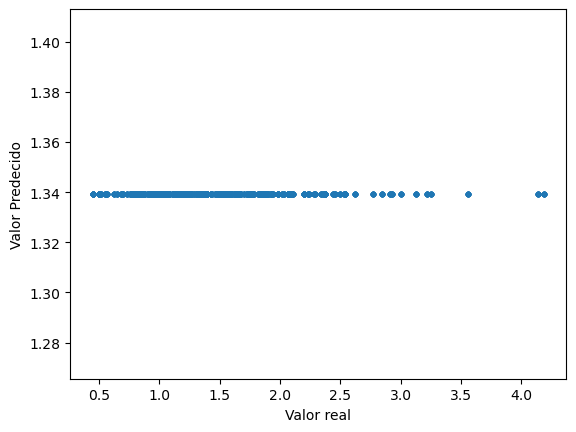

In [59]:
plt.plot(Soluciones['test'], Soluciones['pred'], '.')
plt.xlabel('Valor real')
plt.ylabel('Valor Predecido')
plt.show()

In [ ]:
#Segunda versión MLP

In [104]:
train_loss=[]
test_loss=[]

In [27]:
input_x=layers.Input(1154)
mlp=layers.Dense(256, activation="relu")(input_x)
mlp=layers.Dense(128, activation="relu")(mlp)
mlp=layers.Dropout(.2)(mlp)
mlp=layers.Dense(64, activation="relu")(mlp)
mlp=layers.Dense(32, activation="relu")(mlp)
mlp=layers.Dropout(.2)(mlp)
mlp=layers.Dense(16, activation="relu")(mlp)
mlp = layers.Dense(4, activation="relu")(mlp)
mlp=layers.Dropout(.2)(mlp)
mlp = layers.Dense(1, activation="linear")(mlp)
model_MLP2 = Model(inputs=input_x, outputs=mlp)

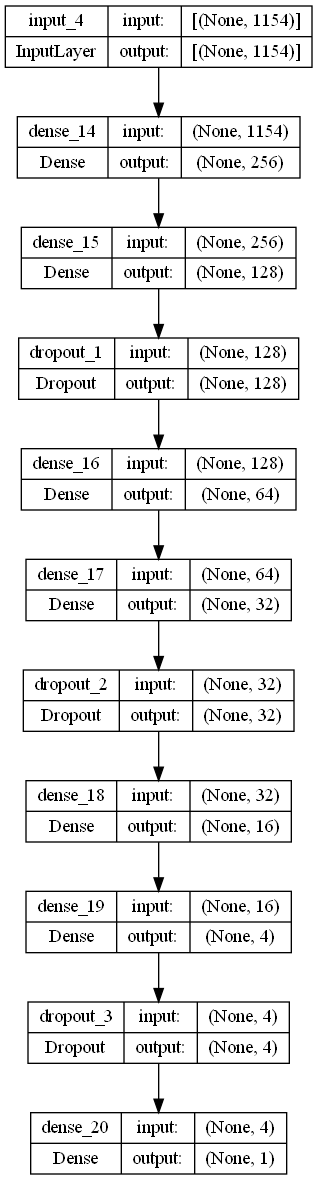

In [28]:
model_MLP2.summary()

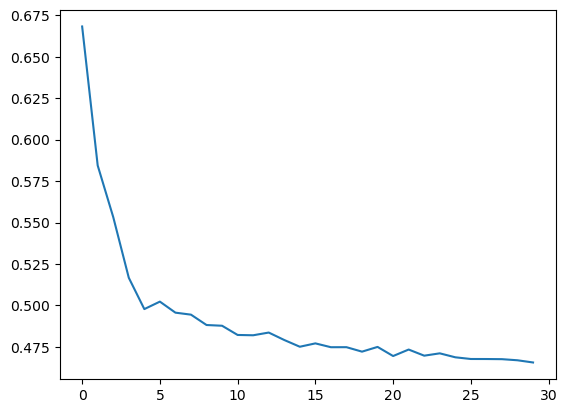

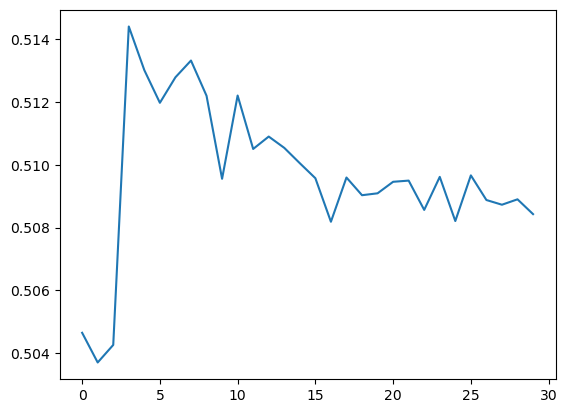

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:26<00:00,  2.90s/it]


In [106]:
batch_size = 8
epochs = 30
model_MLP2.compile(optimizer=Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError()
             )

for e in tqdm.tqdm(range(epochs)):
    loss = []
    for i in tqdm.tqdm(range(len(train_nir)//batch_size)):
        x_nir=train_nir[batch_size*i:batch_size*(i+1)]
        y=train_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_MLP2.train_on_batch(x_nir, y))
    train_loss.append(np.mean(np.array(loss)))

    loss = []
    for i in tqdm.tqdm(range(len(test_nir)//batch_size)):
        x_nir=test_nir[batch_size*i:batch_size*(i+1)]
        y=test_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_MLP2.test_on_batch(x_nir, y))
    test_loss.append(np.mean(np.array(loss)))

    clear_output()

    model_MLP.save("Modelo_MLP2.keras")
    with open("train_lMLP2", "wb") as fp:   
        pickle.dump(train_loss, fp)
    with open("test_lMLP2", "wb") as fp:   
        pickle.dump(test_loss, fp)
    
    plt.plot(range(len(train_loss)), train_loss)
    plt.show()
    plt.plot(range(len(test_loss)), test_loss)
    plt.show()

In [107]:
preds = model_MLP2.predict(test_nir,1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(test_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))
Soluciones.to_csv("Test_MLP2.csv")

63/63 [==============================] - 0s 1ms/step


,pred,test,error
0,1.318151,1.544567,-0.226416
1,1.318151,0.758149,0.560002
2,1.318151,0.344058,0.974094
3,1.318151,0.794822,0.523330
4,1.318151,1.085144,0.233007
...,...,...,...
58,1.318151,1.414431,-0.096280
59,1.318151,1.184465,0.133686
60,1.318151,1.918421,-0.600270
61,1.318151,1.098132,0.220019


0.48457602223709345


In [100]:
train_loss=[]
test_loss=[]

In [29]:
input_x=layers.Input(1154)
mlp=layers.Dense(256, activation="relu")(input_x)
mlp=layers.Dense(128, activation="relu")(mlp)
mlp=layers.Dense(64, activation="relu")(mlp)
mlp=layers.Dense(32, activation="relu")(mlp)
mlp=layers.Dense(16, activation="relu")(mlp)
mlp = layers.Dense(4, activation="relu")(mlp)
mlp = layers.Dense(1, activation="linear")(mlp)
model_MLP3 = Model(inputs=input_x, outputs=mlp)

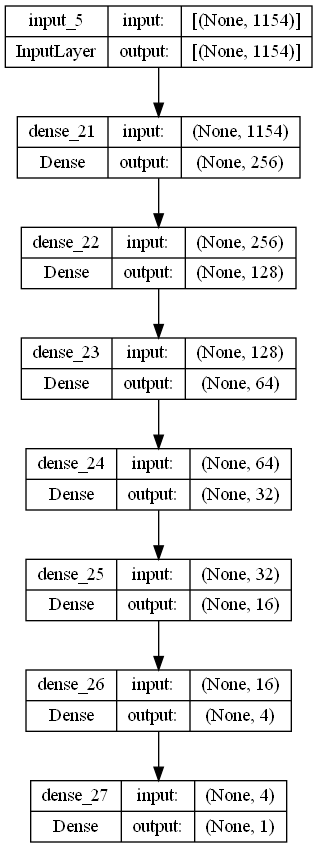

In [30]:
model_MLP3.summary()

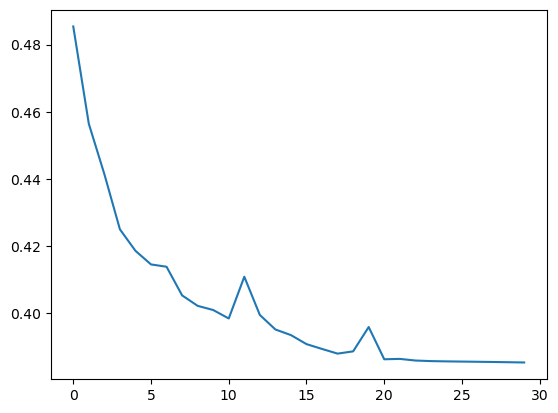

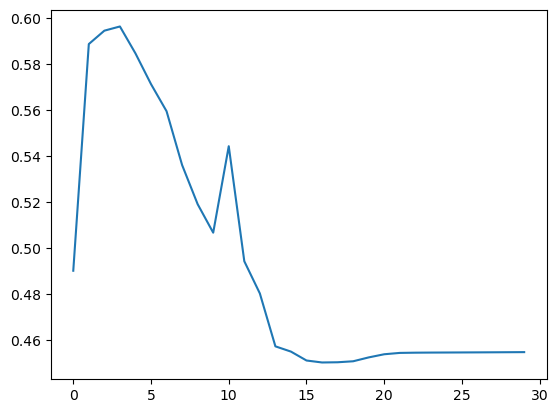

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:26<00:00,  2.90s/it]


In [102]:
batch_size = 8
epochs = 30
model_MLP3.compile(optimizer=Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError()
             )

for e in tqdm.tqdm(range(epochs)):
    loss = []
    for i in tqdm.tqdm(range(len(train_nir)//batch_size)):
        x_nir=train_nir[batch_size*i:batch_size*(i+1)]
        y=train_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_MLP3.train_on_batch(x_nir, y))
    train_loss.append(np.mean(np.array(loss)))

    loss = []
    for i in tqdm.tqdm(range(len(test_nir)//batch_size)):
        x_nir=test_nir[batch_size*i:batch_size*(i+1)]
        y=test_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_MLP3.test_on_batch(x_nir, y))
    test_loss.append(np.mean(np.array(loss)))

    clear_output()

    model_MLP.save("Modelo_MLP3.keras")
    with open("train_lMLP3", "wb") as fp:   
        pickle.dump(train_loss, fp)
    with open("test_lMLP3", "wb") as fp:   
        pickle.dump(test_loss, fp)
    
    plt.plot(range(len(train_loss)), train_loss)
    plt.show()
    plt.plot(range(len(test_loss)), test_loss)
    plt.show()

In [103]:
preds = model_MLP3.predict(test_nir,1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(test_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))
Soluciones.to_csv("Test_MLP3.csv")

63/63 [==============================] - 0s 861us/step


,pred,test,error
0,1.44593,1.544567,-0.098637
1,1.44593,0.758149,0.687781
2,1.44593,0.344058,1.101872
3,1.44593,0.794822,0.651108
4,1.44593,1.085144,0.360786
...,...,...,...
58,1.44593,1.414431,0.031499
59,1.44593,1.184465,0.261465
60,1.44593,1.918421,-0.472491
61,1.44593,1.098132,0.347798


0.48107279503012323


In [ ]:
MeanSquaredError

In [ ]:
#######MOdelo 3######

In [ ]:
#######MOdelo 3######

In [ ]:
#######MOdelo 3######

In [ ]:
#######MOdelo 3######

In [ ]:
#######MOdelo 3######

In [ ]:
#######MOdelo 3######

In [ ]:
#######MOdelo 3######

In [19]:
train_loss=[]
test_loss=[]

In [3]:
input_y=layers.Input((2048, 2048, 3))

cnn=layers.Conv2D(4, 3,padding="same", activation='relu')(input_y)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(8, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(16, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(32, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(64, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(128, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(4, 4))(cnn)

cnn=layers.Flatten()(cnn)
cnn=layers.Dense(128, activation='relu')(cnn)
cnn=layers.Dropout(.35)(cnn)
cnn =layers.Dense(64, activation='relu')(cnn)
cnn =layers.Dense(32, activation='relu')(cnn)
cnn=layers.Dense(16, activation="relu")(cnn)

cnn = layers.Dense(4, activation="relu")(cnn)
cnn = layers.Dense(1, activation="linear")(cnn)
model_CNN = Model(inputs=input_y, outputs=cnn)

In [32]:
batch_size = 8
epochs = 100
model_CNN.compile(optimizer=Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError()
             )

for e in tqdm.tqdm(range(epochs)):
    loss = []
    for i in tqdm.tqdm(range(len(train_im)//batch_size)):
        x_im=train_im[batch_size*i:batch_size*(i+1), :, :, :]
        y=train_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_CNN.train_on_batch(x_im, y))
    train_loss.append(np.mean(np.array(loss)))

    loss = []
    for i in tqdm.tqdm(range(len(test_im)//batch_size)):
        x_im=test_im[batch_size*i:batch_size*(i+1), :, :, :]
        y=test_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_CNN.test_on_batch(x_im, y))
    test_loss.append(np.mean(np.array(loss)))

    clear_output()

    model_CNN.save("Modelo_CNN.keras")
    with open("train_lCNN", "wb") as fp:   
        pickle.dump(train_loss, fp)
    with open("test_lCNN", "wb") as fp:   
        pickle.dump(test_loss, fp)
    
    plt.plot(range(len(train_loss)), train_loss)
    plt.show()
    plt.plot(range(len(test_loss)), test_loss)
    plt.show()

  0%|                                                                                          | 0/100 [03:37<?, ?it/s]


RuntimeError: Can't decrement id ref count (unable to extend file properly)

In [7]:
#RESULTADOS DEL MODELO 3
model_CNN = load_model("Modelo_CNN.keras")
with open("train_lCNN", "rb") as fp:   
    train_loss = pickle.load(fp)
with open("test_lCNN", "rb") as fp:   
    test_loss = pickle.load(fp)
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Número de épocas')
plt.ylabel('Total Train Loss')
plt.show()
plt.plot(range(len(test_loss)), test_loss)
plt.xlabel('Número de épocas')
plt.ylabel('Total Test Loss')
plt.show()

OSError: Unable to open file (truncated file: eof = 34942896, sblock->base_addr = 0, stored_eof = 51720112)

In [120]:
preds = model_CNN.predict(test_im,1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(test_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))
Soluciones.to_csv("Test_CNN.csv")

63/63 [==============================] - 1s 20ms/step


,pred,test,error
0,1.213348,1.544567,-0.331220
1,1.369310,0.758149,0.611161
2,1.535691,0.344058,1.191634
3,1.161631,0.794822,0.366809
4,1.145067,1.085144,0.059923
...,...,...,...
58,1.692729,1.414431,0.278298
59,1.727755,1.184465,0.543290
60,1.150149,1.918421,-0.768272
61,1.203371,1.098132,0.105239


0.48400464585300884


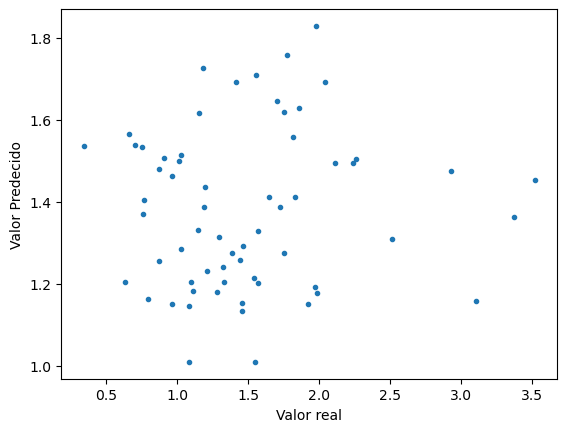

0.48400464585300884


In [121]:
plt.plot(Soluciones['test'], Soluciones['pred'], '.')
plt.xlabel('Valor real')
plt.ylabel('Valor Predecido')
plt.show()
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))

In [118]:
preds = model_CNN.predict(train_im,1)
Soluciones=pd.DataFrame()
temp=[]
for x in preds:
    temp.append(x[0])
Soluciones['pred']=pd.Series(temp)
Soluciones['test']=pd.Series(train_val)
Soluciones['error']=Soluciones['pred']-Soluciones['test']
display(Soluciones)
print(np.mean(Soluciones['error']))
print(np.median(Soluciones['error']))
print(np.std(Soluciones['error']))

3024/3024 [==============================] - 60s 20ms/step


,pred,test,error
0,0.845652,0.689134,0.156518
1,0.779851,0.689134,0.090717
2,0.815533,0.689134,0.126398
3,0.844556,0.689134,0.155422
4,0.846398,0.689134,0.157264
...,...,...,...
3019,1.352591,1.473769,-0.121178
3020,1.414659,1.473769,-0.059110
3021,1.376008,1.473769,-0.097762
3022,1.303398,1.473769,-0.170372


-0.12487289956414147
-0.08201163001098632
0.2231321797586233


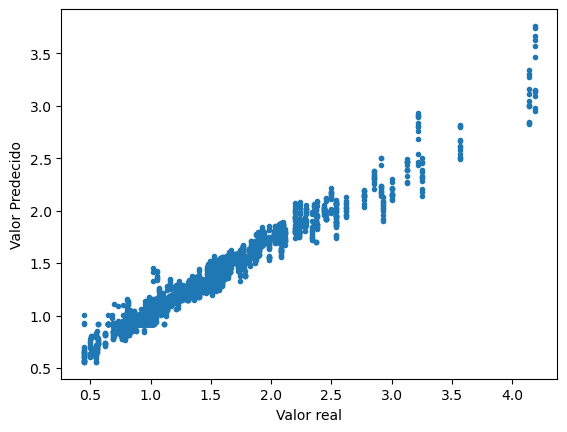

0.17458902445842753


In [119]:
plt.plot(Soluciones['test'], Soluciones['pred'], '.')
plt.xlabel('Valor real')
plt.ylabel('Valor Predecido')
plt.show()
print(mean_absolute_error(Soluciones['test'], Soluciones['pred']))

In [ ]:
##SAEGUNDO TRY MODELO IMAGENES####

In [122]:
train_loss=[]
test_loss=[]

In [123]:
input_y=layers.Input((2048, 2048, 3))

cnn=layers.Conv2D(8, 3,padding="same", activation='relu')(input_y)
cnn=layers.Conv2D(8, 3,padding="same", activation='relu')(input_y)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(16, 3,padding="same", activation='relu')(cnn)
cnn=layers.Conv2D(16, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(32, 3,padding="same", activation='relu')(cnn)
cnn=layers.Conv2D(32, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(64, 3,padding="same", activation='relu')(cnn)
cnn=layers.Conv2D(64, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(128, 3,padding="same", activation='relu')(cnn)
cnn=layers.Conv2D(128, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(256, 3,padding="same", activation='relu')(cnn)
cnn=layers.Conv2D(256, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Conv2D(512, 3,padding="same", activation='relu')(cnn)
cnn=layers.Conv2D(512, 3,padding="same", activation='relu')(cnn)
cnn =layers.MaxPooling2D(pool_size=(2, 2))(cnn)

cnn=layers.Flatten()(cnn)
cnn=layers.Dropout(.5)(cnn)
cnn=layers.Dense(128, activation='relu')(cnn)
cnn =layers.Dense(64, activation='relu')(cnn)
cnn =layers.Dense(32, activation='relu')(cnn)
cnn=layers.Dense(16, activation="relu")(cnn)

cnn = layers.Dense(4, activation="relu")(cnn)
cnn = layers.Dense(1, activation="linear")(cnn)
model_CNN2 = Model(inputs=input_y, outputs=cnn)

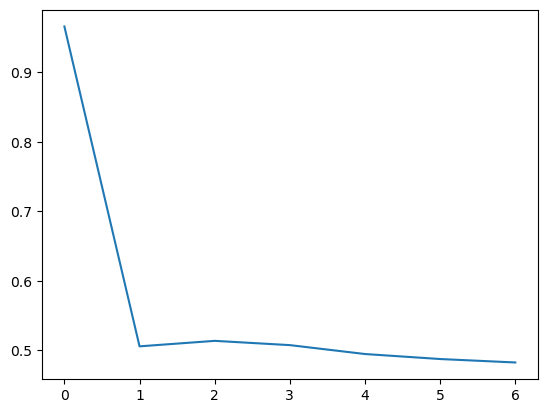

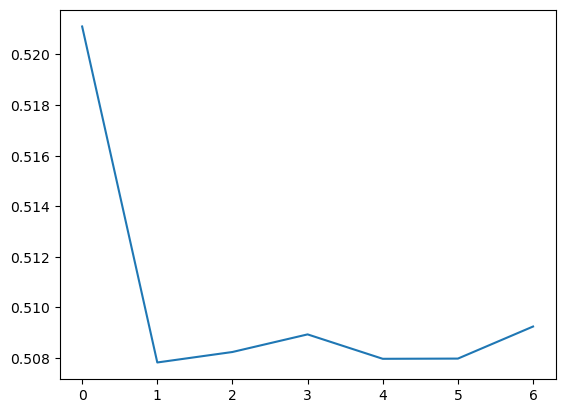

  5%|████▏                                                                       | 7/128 [1:22:51<23:52:21, 710.26s/it]


KeyboardInterrupt: 

In [124]:
batch_size = 8
epochs = 128
model_CNN2.compile(optimizer=Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError()
             )

for e in tqdm.tqdm(range(epochs)):
    loss = []
    for i in tqdm.tqdm(range(len(train_im)//batch_size)):
        x_im=train_im[batch_size*i:batch_size*(i+1), :, :, :]
        y=train_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_CNN2.train_on_batch(x_im, y))
    train_loss.append(np.mean(np.array(loss)))

    loss = []
    for i in tqdm.tqdm(range(len(test_im)//batch_size)):
        x_im=test_im[batch_size*i:batch_size*(i+1), :, :, :]
        y=test_val[batch_size*i:batch_size*(i+1)]
        loss.append(model_CNN2.test_on_batch(x_im, y))
    test_loss.append(np.mean(np.array(loss)))

    clear_output()

    model_CNN.save("Modelo_CNN2.keras")
    with open("train_lCNN2", "wb") as fp:   
        pickle.dump(train_loss, fp)
    with open("test_lCNN2", "wb") as fp:   
        pickle.dump(test_loss, fp)
    
    plt.plot(range(len(train_loss)), train_loss)
    plt.show()
    plt.plot(range(len(test_loss)), test_loss)
    plt.show()